C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

Cluster Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


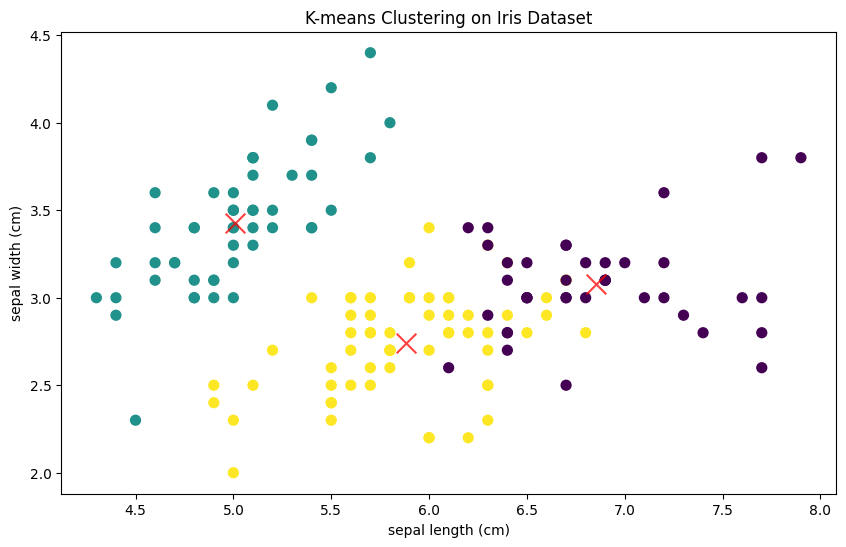

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
print("Cluster Labels:\n", labels)
print("Cluster Centers:\n", centers)
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering on Iris Dataset')
plt.show()


Cluster Labels (Mapped):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Accuracy: 0.8866666666666667
F1 Score: 0.8852785369639302
Precision: 0.8978562421185372
Recall: 0.8866666666666667
Silhouette Score: 0.551191604619592
Adjusted Rand Index: 0.7163421126838476


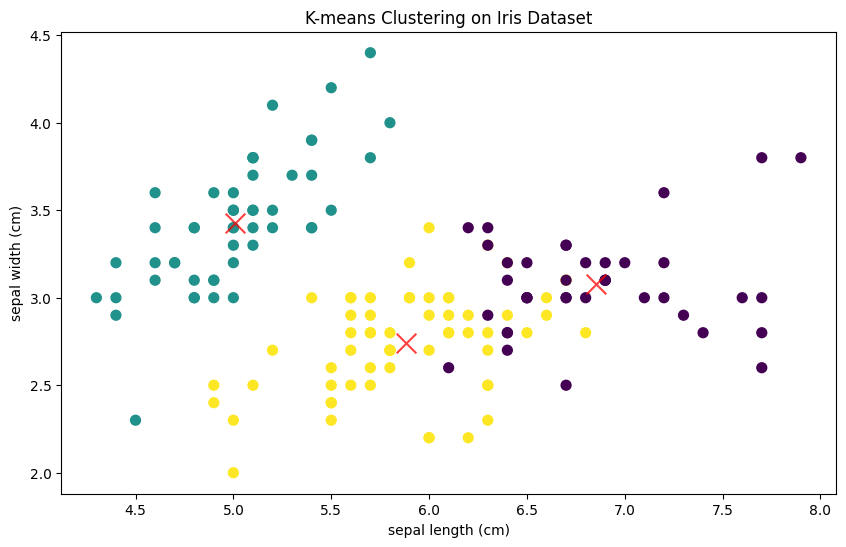

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0, 14, 36]], dtype=int64)

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Map the cluster labels to the true labels
# The mode function is used to find the most common label in each cluster
labels_mapped = np.zeros_like(labels)
for i in range(3):
    mask = (labels == i)
    labels_mapped[mask] = mode(y[mask])[0]

# Get the cluster centers
centers = kmeans.cluster_centers_

# Calculate metrics
accuracy = accuracy_score(y, labels_mapped)
f1 = f1_score(y, labels_mapped, average='weighted')
precision = precision_score(y, labels_mapped, average='weighted')
recall = recall_score(y, labels_mapped, average='weighted')

silhouette_avg = silhouette_score(X, labels)
ari = adjusted_rand_score(y, labels)

# Print the results
print(f"Cluster Labels (Mapped):\n{labels_mapped}")
print(f"Cluster Centers:\n{centers}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Rand Index: {ari}")

# Convert to a DataFrame for easier plotting
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels

# Plot the clusters using two features for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering on Iris Dataset')
plt.show()
conf = confusion_matrix(y, labels_mapped)
conf

Cluster Labels (Mapped):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Accuracy: 0.8866666666666667
F1 Score: 0.8852785369639302
Precision: 0.8978562421185372
Recall: 0.8866666666666667
Silhouette Score: 0.5511916046195927
Adjusted Rand Index: 0.7163421126838476


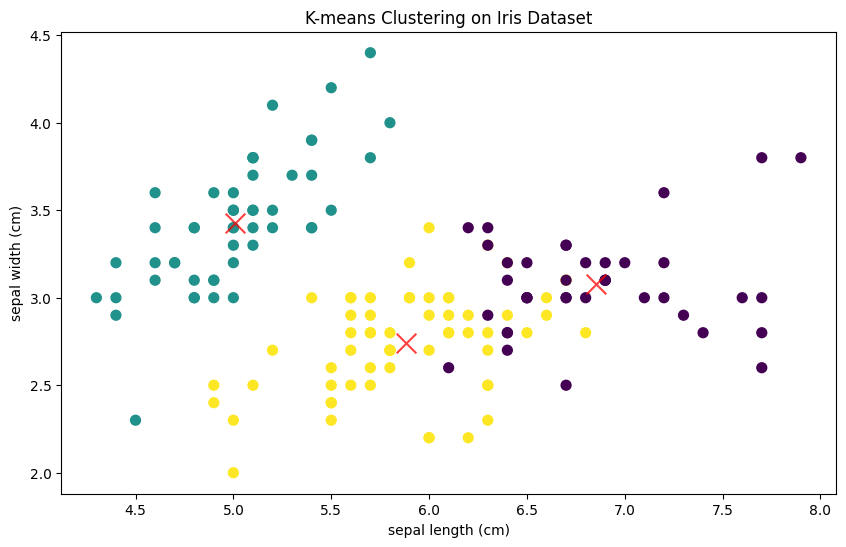

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import numpy as np

# Load the Iris dataset from a local CSV file
df = pd.read_csv('iris.csv')

# Extract features and labels
X = df.iloc[:, :-1].values  # All columns except the last one (features)
y = df['target'].values     # Last column (target)

# Initialize the KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Map the cluster labels to the true labels
labels_mapped = np.zeros_like(labels)
for i in range(3):
    mask = (labels == i)
    labels_mapped[mask] = mode(y[mask])[0]

# Get the cluster centers
centers = kmeans.cluster_centers_

# Calculate metrics
accuracy = accuracy_score(y, labels_mapped)
f1 = f1_score(y, labels_mapped, average='weighted')
precision = precision_score(y, labels_mapped, average='weighted')
recall = recall_score(y, labels_mapped, average='weighted')

silhouette_avg = silhouette_score(X, labels)
ari = adjusted_rand_score(y, labels)

# Print the results
print(f"Cluster Labels (Mapped):\n{labels_mapped}")
print(f"Cluster Centers:\n{centers}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Rand Index: {ari}")

# Add the cluster labels to the DataFrame for visualization
df['Cluster'] = labels

# Plot the clusters using two features for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-means Clustering on Iris Dataset')
plt.show()

# Compute the confusion matrix
conf = confusion_matrix(y, labels_mapped)
print(f"Confusion Matrix:\n{conf}")


Accuracy: 0.8866666666666667
F1 Score: 0.8852785369639302
Precision: 0.8978562421185372
Recall: 0.8866666666666667
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Silhouette Score: 0.5511916046195927
Adjusted Rand Index: 0.7163421126838476
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


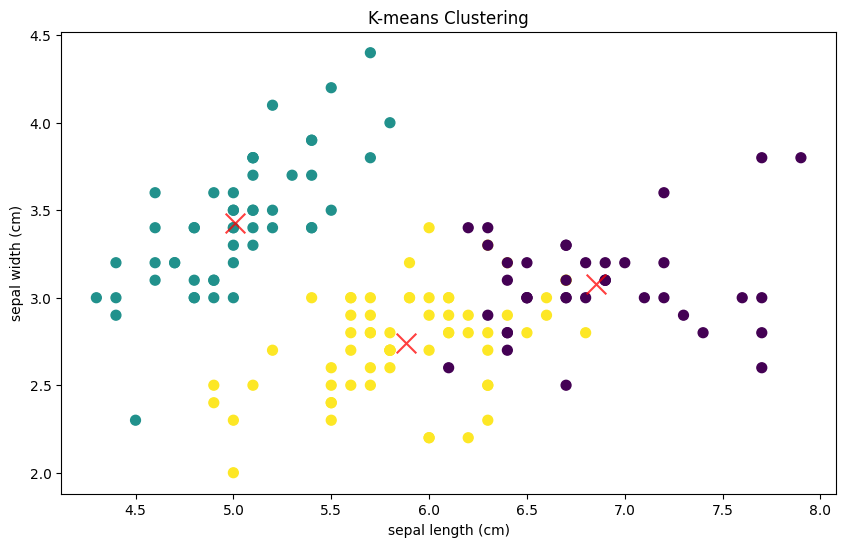

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import numpy as np

# Function to perform K-means clustering on any dataset
def kmeans_clustering(file_path, n_clusters, target_column=None):
    # Load the dataset from a CSV file
    df = pd.read_csv(file_path)

    # Check if the target column is specified
    if target_column and target_column in df.columns:
        X = df.drop(columns=[target_column]).values  # Features
        y = df[target_column].values                # Target
    else:
        X = df.values  # Use all columns as features
        y = None

    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Predict the cluster for each data point
    labels = kmeans.predict(X)

    if y is not None:
        # Map the cluster labels to the true labels (if target is available)
        labels_mapped = np.zeros_like(labels)
        for i in range(n_clusters):
            mask = (labels == i)
            if len(y[mask]) > 0:
                labels_mapped[mask] = mode(y[mask])[0]

        # Calculate metrics if the target column is specified
        accuracy = accuracy_score(y, labels_mapped)
        f1 = f1_score(y, labels_mapped, average='weighted')
        precision = precision_score(y, labels_mapped, average='weighted')
        recall = recall_score(y, labels_mapped, average='weighted')

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")

        # Confusion matrix
        conf = confusion_matrix(y, labels_mapped)
        print(f"Confusion Matrix:\n{conf}")
    else:
        print("No target column specified, skipping accuracy-related metrics.")

    # Calculate cluster evaluation metrics
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg}")

    if y is not None:
        ari = adjusted_rand_score(y, labels)
        print(f"Adjusted Rand Index: {ari}")

    # Get the cluster centers
    centers = kmeans.cluster_centers_
    print(f"Cluster Centers:\n{centers}")

    # Plot the clusters using the first two features for visualization
    if X.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
        plt.xlabel(df.columns[0])
        plt.ylabel(df.columns[1])
        plt.title('K-means Clustering')
        plt.show()
    else:
        print("Not enough features for plotting (requires at least two).")

# Example usage
# File path to the CSV file
file_path = 'iris.csv'  # Change to your file path
n_clusters = 3  # Number of clusters to form
target_column = 'target'  # Change to your target column name or set to None if there is no target

kmeans_clustering(file_path, n_clusters, target_column)